#### Preliminaries

First we import the libraries we will need, and the data.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.colors import ListedColormap
import numpy as np
import scipy as sp
import seaborn as sns
import math, dcor

%matplotlib inline

In [2]:
data = pd.read_csv('Table2_Hunt_2013_edit.csv')
data.describe()

,Gross pay,Phi-h,Position,Pressure,Random 1,Random 2,Gross pay transform,Production
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,9.823810,68.880952,1.885714,15.285714,10.190476,292.714286,16.579524,33.428571
std,5.948521,45.167894,0.708721,2.759400,6.439092,59.429069,6.543793,15.141909
min,0.100000,0.500000,1.000000,10.000000,1.000000,210.000000,3.540000,7.710000
25%,4.900000,24.600000,1.100000,14.000000,6.000000,245.000000,11.520000,22.670000
50%,10.000000,72.900000,2.000000,16.000000,10.000000,273.000000,16.900000,36.420000
75%,15.100000,100.000000,2.200000,17.000000,13.000000,340.000000,21.970000,44.200000
max,19.100000,160.000000,2.900000,20.000000,21.000000,395.000000,29.250000,59.200000


In [3]:
# https://stackoverflow.com/a/30942817

def corrfunc(x, y, **kws):
    r, p = sp.stats.spearmanr(x, y)
    #d = sp.spatial.distance.correlation(x,y)
    d = dcor.distance_correlation(x,y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy=(.1, .92), xycoords=ax.transAxes)
    ax.annotate("p = {:.2f}".format(p), xy=(.1, .85), xycoords=ax.transAxes)
    #ax.annotate("d = {:.2f}".format(d), xy=(.1, .78), xycoords=ax.transAxes)

/anaconda2/envs/py36/lib/python3.6/site-packages/dcor/_utils.py:88: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return ((np.issubdtype(x.dtype, float) and
/anaconda2/envs/py36/lib/python3.6/site-packages/dcor/_utils.py:90: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  (np.issubdtype(x.dtype, int) and
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/anaconda2/envs/py36/lib/python3.6/site-packages/ma

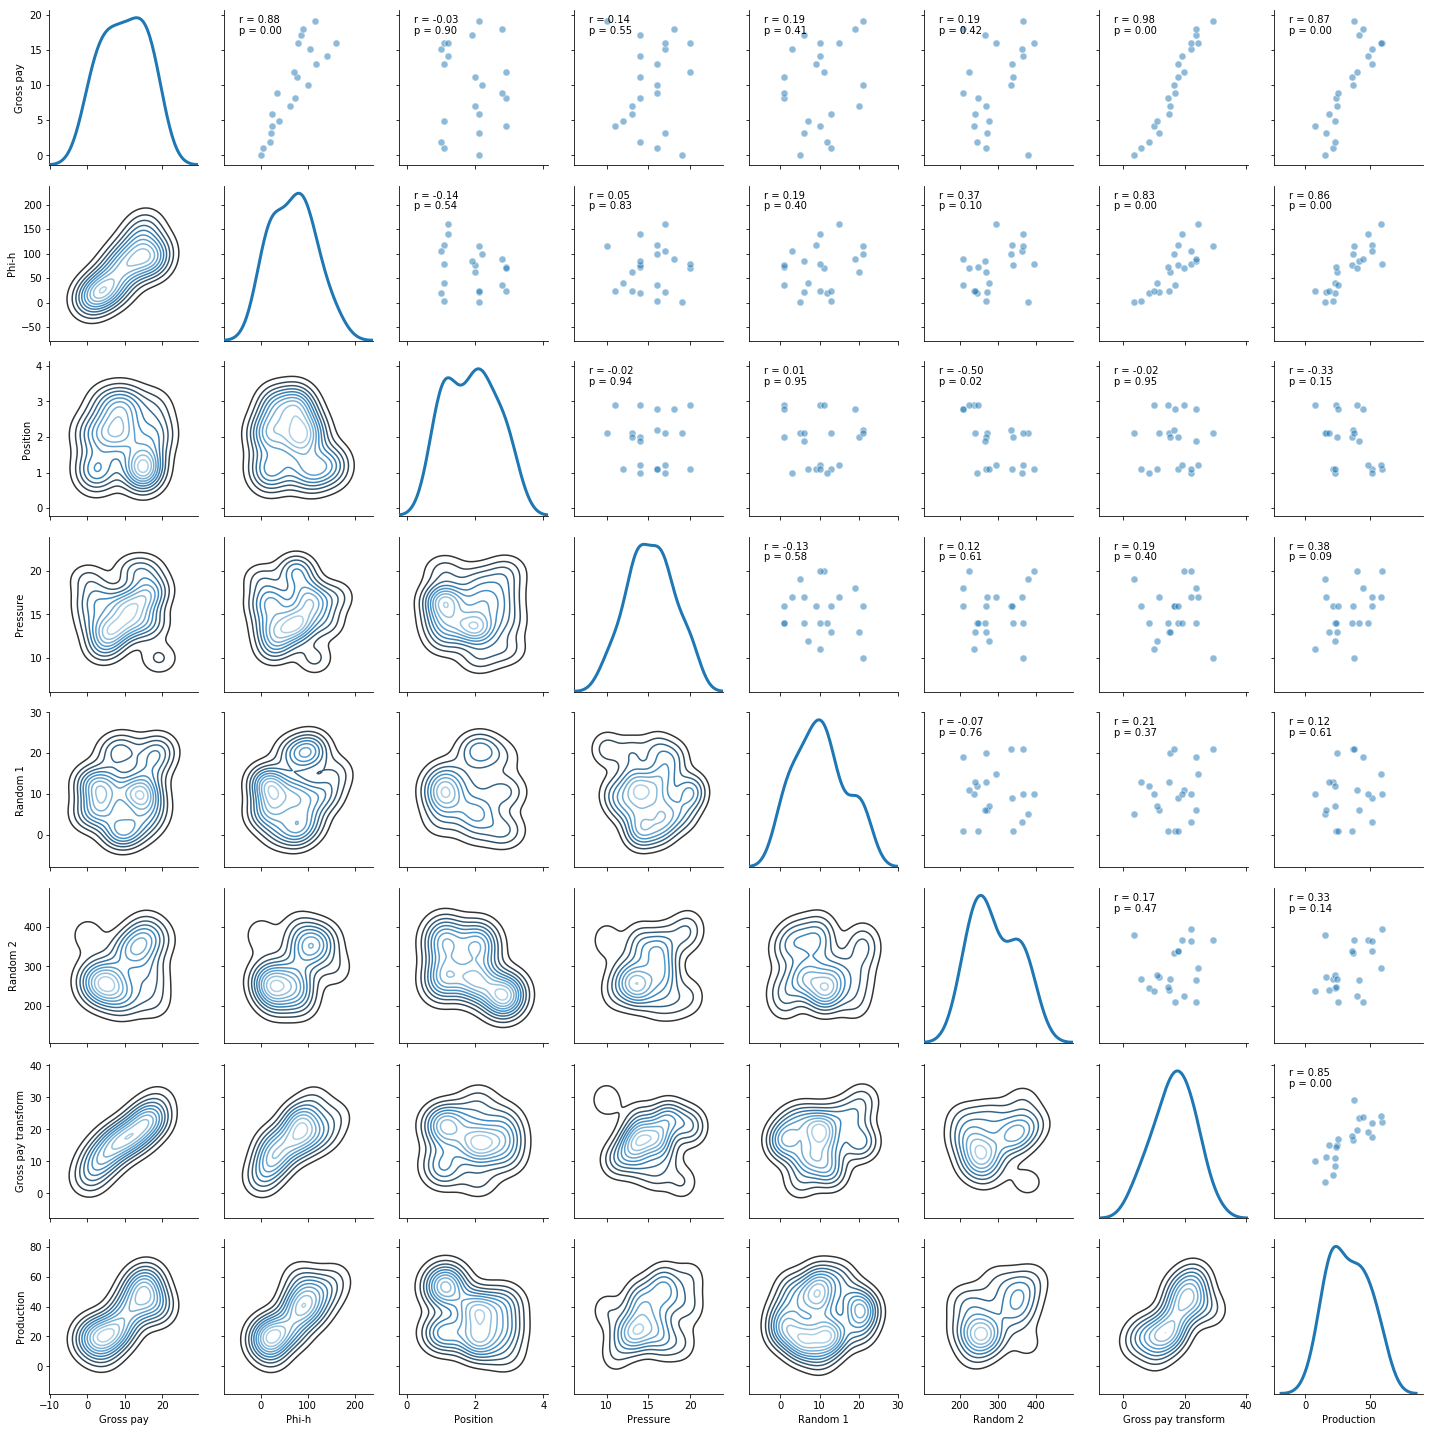

In [4]:
#my_cmap = sns.cubehelix_palette(as_cmap=True, start=.2, rot=-.85, reverse=True)
#my_cmap = sns.cubehelix_palette(as_cmap=True, start=2, rot=0, dark=0, light=.95, reverse=True)
#https://seaborn.pydata.org/tutorial/color_palettes.html
    
#my_cmap = sns.light_palette("Navy", as_cmap=True)
#https://stackoverflow.com/questions/37902459/how-do-i-use-seaborns-color-palette-as-a-colormap-in-matplotlib


g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes

g.map_upper(plt.scatter, linewidths=1, edgecolor="w", s=50, alpha = 0.5)
g.map_upper(corrfunc)
#g.map_upper(plt.hexbin, cmap='inferno', gridsize=15)
#g.map_upper(plt.hexbin, cmap=my_cmap, gridsize=15)

g.map_diag(sns.kdeplot, lw=3)

g.map_lower(sns.kdeplot, cmap="Blues_d")


#plt.savefig('matrix.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()